In [4]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np

src_path = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python_da/kaggle_boston_price.csv'

#한글이 포함된경우 encoding='CP949'를 반드시 넣어주세요.
df = pd.read_csv(src_path, sep=',') 

print(df.head(5))

         TOWN     LON      LAT  CMEDV     CRIM    ZN  INDUS  CHAS    NOX  \
0      Nahant -70.955  42.2550   24.0  0.00632  18.0   2.31     0  0.538   
1  Swampscott -70.950  42.2875   21.6  0.02731   0.0   7.07     0  0.469   
2  Swampscott -70.936  42.2830   34.7  0.02729   0.0   7.07     0  0.469   
3  Marblehead -70.928  42.2930   33.4  0.03237   0.0   2.18     0  0.458   
4  Marblehead -70.922  42.2980   36.2  0.06905   0.0   2.18     0  0.458   

      RM   AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  
0  6.575  65.2  4.0900    1  296     15.3  396.90   4.98  
1  6.421  78.9  4.9671    2  242     17.8  396.90   9.14  
2  7.185  61.1  4.9671    2  242     17.8  392.83   4.03  
3  6.998  45.8  6.0622    3  222     18.7  394.63   2.94  
4  7.147  54.2  6.0622    3  222     18.7  396.90   5.33  


In [5]:
MAX_TAX = df['TAX'].max()
MIN_TAX = df['TAX'].min()

TAX_RANGE = MAX_TAX - MIN_TAX

Interval = TAX_RANGE/3

high = df['TAX'].max()

df['TAX_GRADE'] = np.where(
    df['TAX'] >= (MAX_TAX-Interval), 'H', np.where(
        df['TAX'] > (MIN_TAX+Interval), 'M', 'L'
    )
)

print(df['TAX_GRADE'].value_counts())

L    273
H    137
M     96
Name: TAX_GRADE, dtype: int64


In [6]:
#2-2 : 분석목적에 따른 새로운 변수 생성
#방1개의 가격(RM:자택당 평균 방 개수, CMEDV : 집값)
df['RM_1']=df['CMEDV']/df['RM']
print(df[['CMEDV', 'RM', 'RM_1']].head(5))

   CMEDV     RM      RM_1
0   24.0  6.575  3.650190
1   21.6  6.421  3.363962
2   34.7  7.185  4.829506
3   33.4  6.998  4.772792
4   36.2  7.147  5.065062


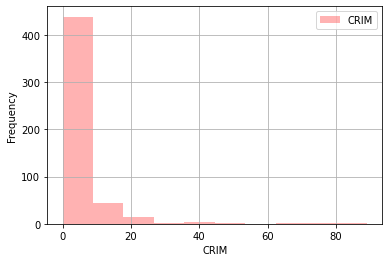

In [8]:
#통계그래프 이용하기
import matplotlib
import matplotlib.pyplot as plt

#3-1 히스토그램(histogram)
#CRIM 범죄율(단위 %)
plt.hist(df['CRIM'], alpha=0.3, bins=10, rwidth=1, color='red', label='CRIM') #bins=구간
plt.legend()
plt.grid()
plt.xlabel('CRIM')
plt.ylabel('Frequency')
plt.show()

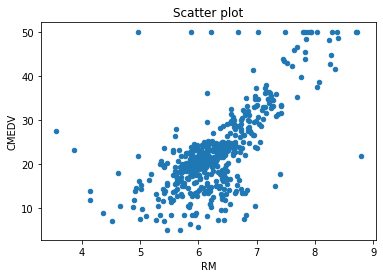

In [9]:
#3-2 산점도(Scatter Plot)
df.plot.scatter(x='RM', y='CMEDV',title='Scatter plot')
plt.show()

L    273
H    137
M     96
Name: TAX_GRADE, dtype: int64


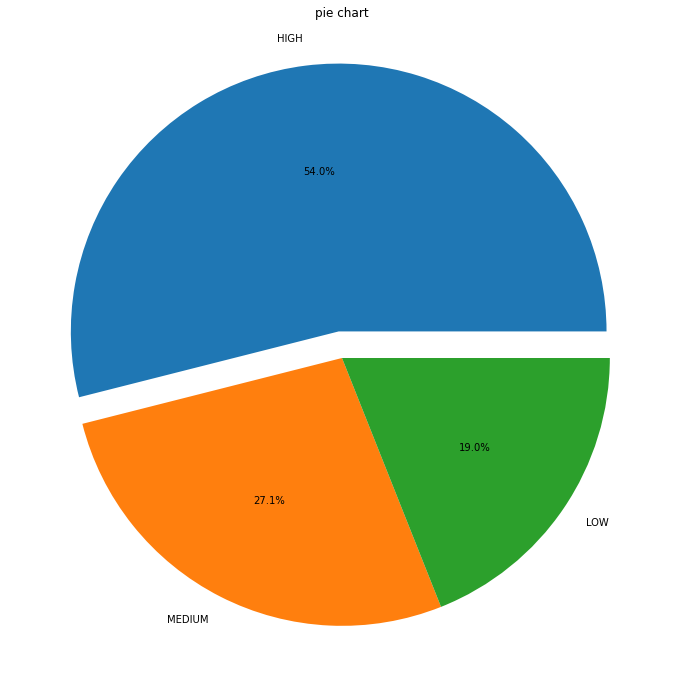

In [10]:
#3-3 파이차트(Pie chart)
print(df['TAX_GRADE'].value_counts())
x = df['TAX_GRADE'].value_counts()
labels=['HIGH', 'MEDIUM', 'LOW']

fig = plt.figure(figsize = (12, 20))
ax = fig.gca()
ax.pie(x, explode=(0.1, 0, 0), labels=labels, autopct='%1.1f%%') #explode=항목 사이의 간격
plt.title('pie chart')
plt.show()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64


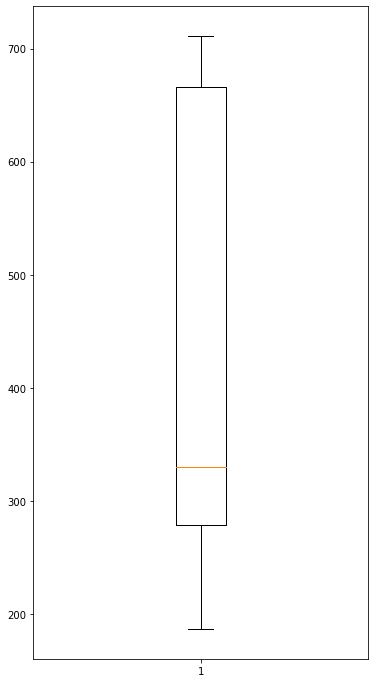

In [11]:
#3-4 상자그림(box plot)
import seaborn as sns

fig = plt.figure(figsize = (6, 12))
ax = fig.gca()

print(df['TAX'].describe())
ax.boxplot([df['TAX']])
plt.show()

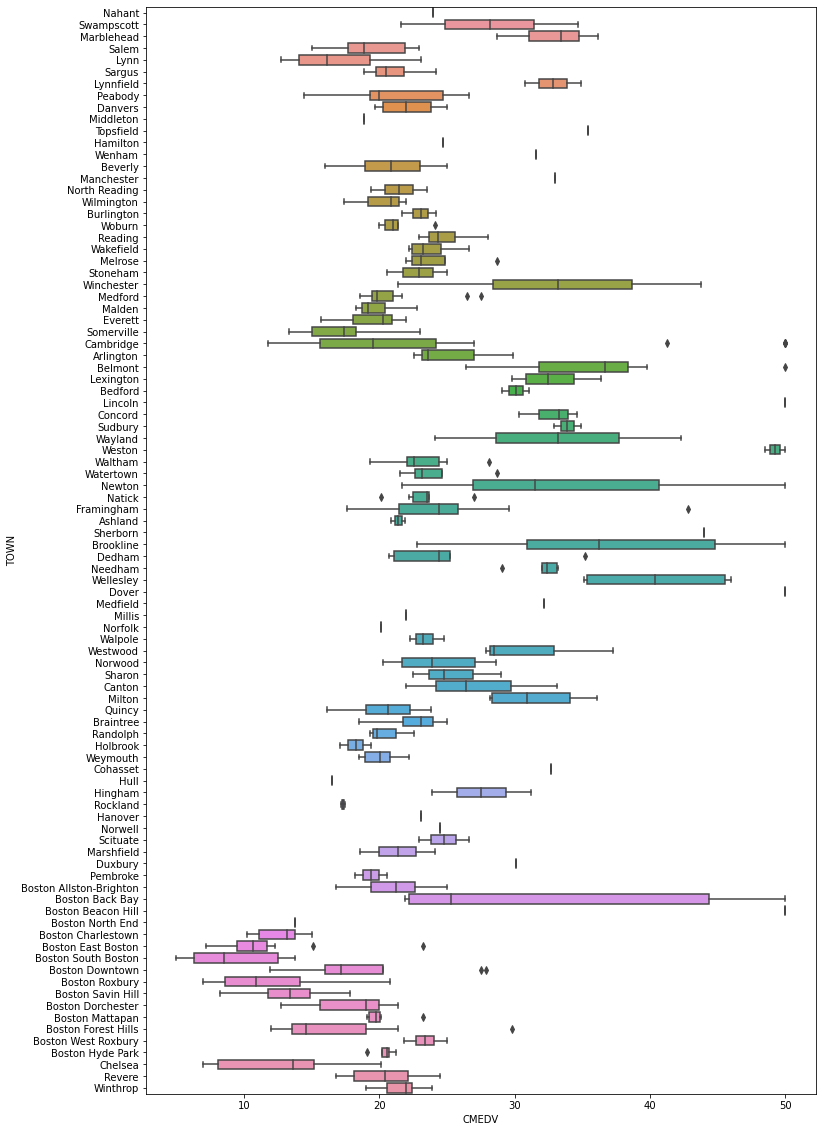

In [12]:
#활용 : 그룹핑된 결과를 한눈에 볼 때도 사용합니다.
fig = plt.figure(figsize = (12, 20))
ax = fig.gca()
sns.boxplot(x='CMEDV', y='TOWN', data=df, ax=ax)
plt.show()

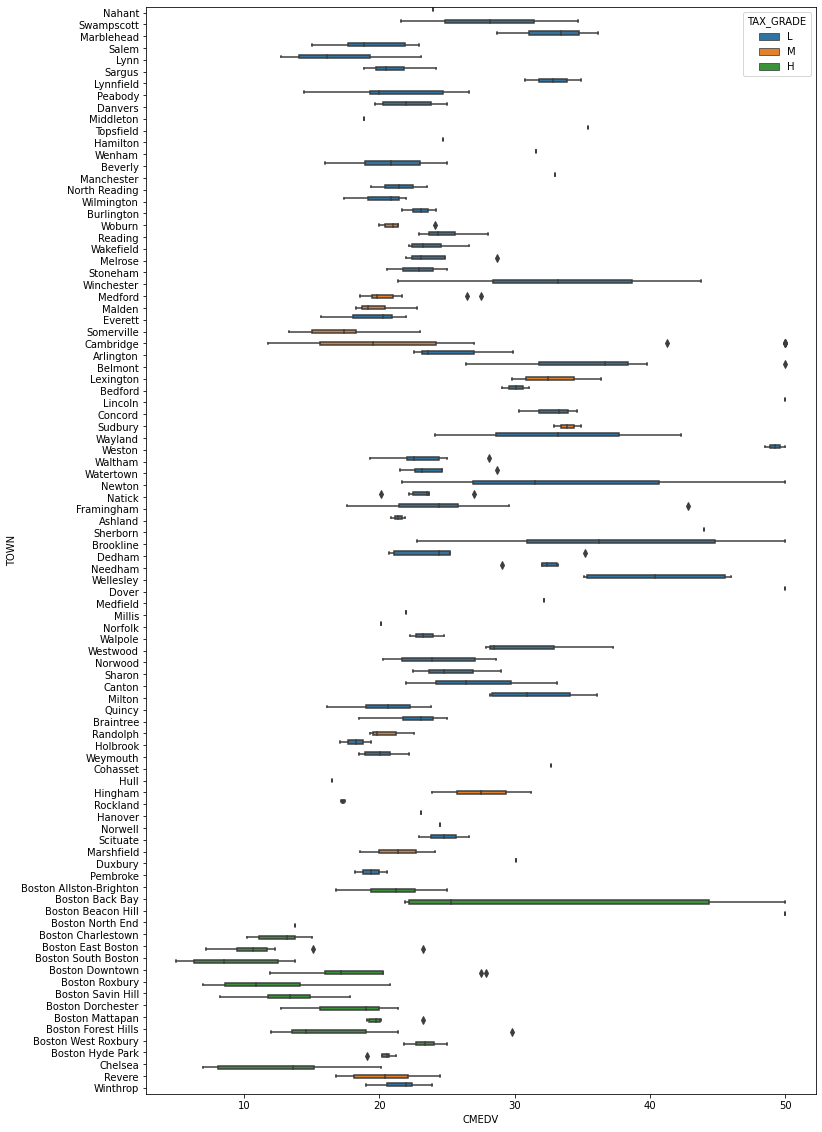

In [13]:
#활용 : 각 TOWN마다 부여된 TAX가 높은지 중간인지 낮은지를 시각화
fig = plt.figure(figsize = (12, 20))
ax = fig.gca()
sns.boxplot(x='CMEDV', y='TOWN', hue='TAX_GRADE', data=df, ax=ax)
plt.show()